In [1]:
from pprint import pprint
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.feature_selection import mutual_info_regression

In [7]:
df=pd.read_csv('/mnt/All/Downloads/ParisHousing.csv')

In [10]:
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [50]:
a={'a',3,6,"j"}
b={3,4,6}
b.pop()


3

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 2057
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               1874 non-null   object 
 1   Price               1874 non-null   int64  
 2   Year                1874 non-null   int64  
 3   Kilometer           1874 non-null   int64  
 4   Fuel Type           1874 non-null   object 
 5   Transmission        1874 non-null   object 
 6   Location            1874 non-null   object 
 7   Color               1874 non-null   object 
 8   Owner               1874 non-null   object 
 9   Seller Type         1874 non-null   object 
 10  Engine              1874 non-null   object 
 11  Max Power           1874 non-null   object 
 12  Max Torque          1874 non-null   object 
 13  Drivetrain          1874 non-null   object 
 14  Length              1874 non-null   float64
 15  Width               1874 non-null   float64
 16  Height

In [10]:
X = df.copy()
y = X.pop("Price",None)

for colname in X.select_dtypes("object"):
    X[colname] = X[colname].factorize()[0]
    
discrete_features=X.dtypes == int


TypeError: DataFrame.pop() takes 2 positional arguments but 3 were given

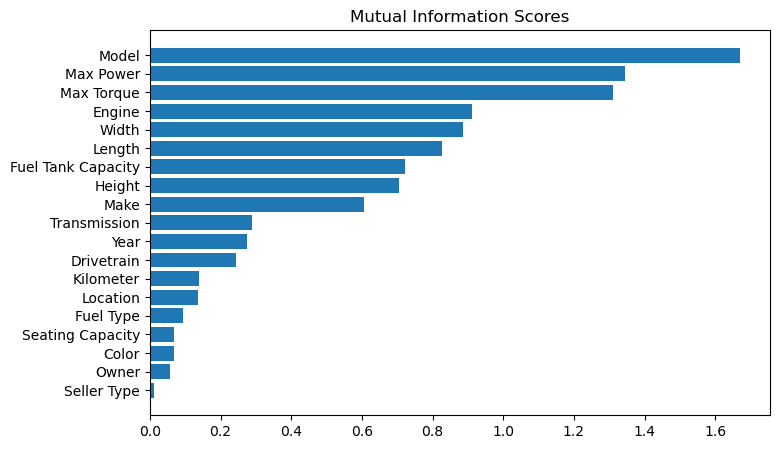

In [54]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)



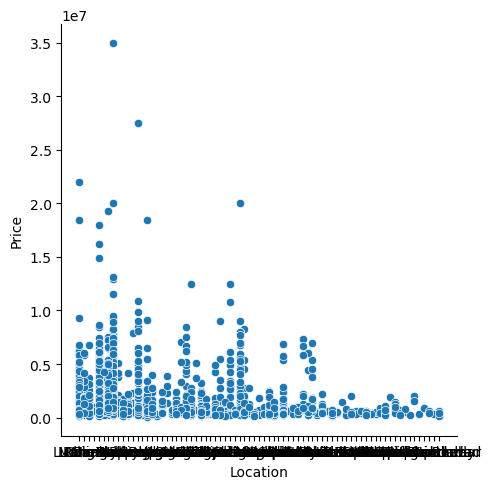

In [19]:
sns.relplot(x="Location", y="Price", data=df)

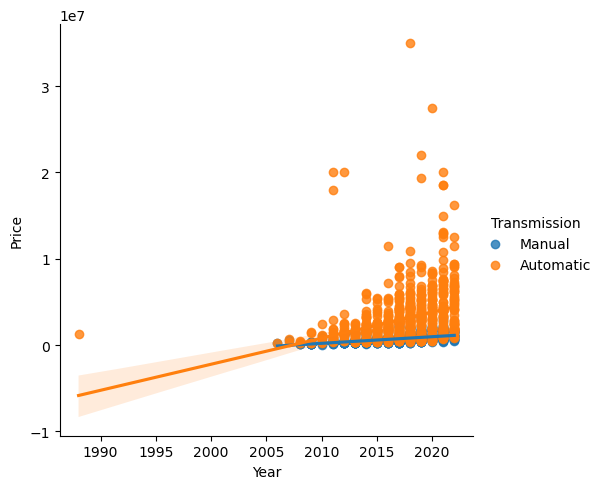

In [23]:
sns.lmplot(x="Year", y="Price", hue="Transmission", data=df);

In [ ]:
X

In [ ]:
txt=list(df.select_dtypes('object').columns)

In [ ]:
df=df.dropna()

In [ ]:
one=OneHotEncoder(sparse_output=False,min_frequency=50)
pk=one.fit_transform(df[txt])
pk=pd.DataFrame(pk)
pk

In [ ]:
df=df.drop(txt,axis=1)

In [ ]:
df=pd.concat([df,pk],axis=1)
df.columns = df.columns.astype(str)
df=df.dropna()
df=df.reset_index(drop=True)
df

In [ ]:
ln=LinearRegression()
ln.fit(df.drop('Price',axis=1),df['Price'])
ln.score(df.drop('Price',axis=1),df['Price'])